In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import holidays

import xgboost 

from sklearn.metrics import mean_squared_error

plotly.tools.set_credentials_file(username='flash_gordon',api_key='3QKX6ConcL0hgn2lmaR8')

In [56]:
train_raw = pd.read_csv('./train.csv')
test_raw = pd.read_csv('./test.csv')

In [4]:
train_raw.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [69]:
np.unique(test_raw.date)

array(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
       '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
       '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16',
       '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
       '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24',
       '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28',
       '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
       '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
       '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09',
       '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13',
       '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-17',
       '2018-02-18', '2018-02-19', '2018-02-20', '2018-02-21',
       '2018-02-22', '2018-02-23', '2018-02-24', '2018-02-25',
       '2018-02-26', '2018-02-27', '2018-02-28', '2018-03-01',
       '2018-03-02', '2018-03-03', '2018-03-04', '2018-

In [60]:
train_raw['day'] = pd.DatetimeIndex(train_raw.date).day
train_raw['month'] = pd.DatetimeIndex(train_raw.date).month
train_raw['year'] = pd.DatetimeIndex(train_raw.date).year

test_raw['day'] = pd.DatetimeIndex(test_raw.date).day
test_raw['month'] = pd.DatetimeIndex(test_raw.date).month
test_raw['year'] = pd.DatetimeIndex(test_raw.date).year

In [61]:
train_raw['weekday'] = [datetime.datetime.strptime(train_raw.date[i],'%Y-%m-%d').weekday()+1 for i in range(0,len(train_raw))]

test_raw['weekday'] = [datetime.datetime.strptime(test_raw.date[i],'%Y-%m-%d').weekday()+1 for i in range(0,len(test_raw))]

# Basic Xgb model

In [35]:
training_data = train_raw.loc[(train_raw.year != 2017),:].copy()
validation_data = train_raw.loc[(train_raw.year == 2017),:].copy()

In [46]:
training_data.holiday = list(training_data.holiday.values)
validation_data.holiday = list(validation_data.holiday.values)

In [59]:
xgmodel = xgboost.XGBRegressor(n_estimators=1000)
xgmodel = xgmodel.fit(train_raw.drop(['sales','date'],1), train_raw.sales)

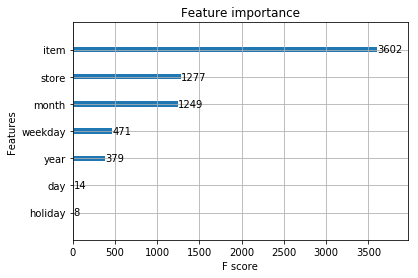

In [49]:
xgboost.plot_importance(xgmodel)

In [67]:
cols = list(train_raw.columns)
cols.remove('sales')
test_raw = test_raw[cols]

In [68]:
preds = xgmodel.predict(test_raw.drop(['date'],1))

In [64]:
print(np.sqrt(mean_squared_error(validation_data.sales,preds)))

10.258812637472955


In [70]:
submissions = pd.read_csv('./sample_submission.csv')
submissions.sales = preds
submissions.to_csv('./xgboost_submission',index = False)